In [5]:

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np


In [6]:
#讀資料
rawdataAll = pd.read_csv('data/flag.csv')
rawdataAll.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [7]:
df = rawdataAll
print(df.shape)

(194, 30)


In [8]:
#string to float
df['29'] = pd.factorize(df['29'])[0] + 1
df['30'] = pd.factorize(df['30'])[0] + 1
df['18'] = pd.factorize(df['18'])[0] + 1
df['1'] = pd.factorize(df['1'])[0] + 1


In [9]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,1,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,1,1
1,2,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,2,2
2,3,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,3,3
3,4,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,4,2
4,5,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,4,2


In [10]:
#切分特徵及答案
features = df.loc[:, ~df.columns.isin(['1','7'])]
target = df['7']
target_names = ['0 Catholic','1 Other Christian','2 Muslim','3 Buddhist','4 Hindu','5 Ethnic','6 Marxist','7 Others ']

0    40
1    60
2    36
3     8
4     4
5    27
6    15
7     4
Name: 7, dtype: int64


Text(0.5, 0, 'class')

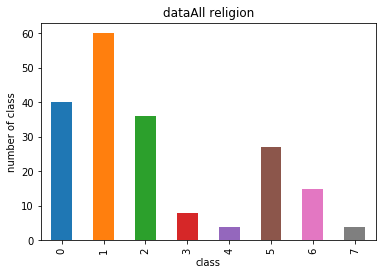

In [11]:
#統計每個類別數量(全部資料)
allTarget = target.value_counts(sort=False)
print(allTarget)

ax = allTarget.plot(kind='bar',title='dataAll religion')
ax.set_ylabel('number of class')
ax.set_xlabel('class')

In [12]:
allTarget

0    40
1    60
2    36
3     8
4     4
5    27
6    15
7     4
Name: 7, dtype: int64

In [13]:
#切分訓練及測試
X_train, X_test,Y_train, Y_test = train_test_split(
    features, target, test_size=0.25, random_state=5)

0    28
1    44
2    31
3     7
4     3
5    20
6     8
7     4
Name: 7, dtype: int64


Text(0.5, 0, 'class')

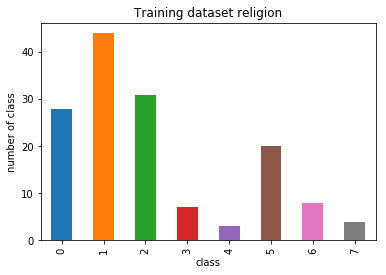

In [14]:
#統計每個類別數量(訓練資料)
trainTarget = Y_train.value_counts(sort=False)
print(trainTarget)
ax = trainTarget.plot(kind='bar',title='Training dataset religion')
ax.set_ylabel('number of class')
ax.set_xlabel('class')

0    12
1    16
2     5
3     1
4     1
5     7
6     7
Name: 7, dtype: int64


Text(0.5, 0, 'class')

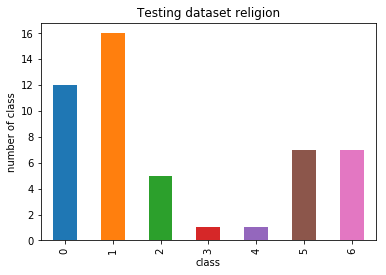

In [15]:
#畫原始分布
testTarget = Y_test.value_counts(sort=False)
print(testTarget)
ax = testTarget.plot(kind='bar',title='Testing dataset religion')
ax.set_ylabel('number of class')
ax.set_xlabel('class')

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns; sns.set()

In [17]:
#建立貝氏分類器
nbm = GaussianNB()
nbm.fit(X_train,Y_train)
Y_predict = nbm.predict(X_test)

In [18]:
Y_predict = nbm.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.40816326530612246

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.67      0.62      0.65        16
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      0.86      0.63         7
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         0

   micro avg       0.41      0.41      0.41        49
   macro avg       0.22      0.23      0.21        49
weighted avg       0.43      0.41      0.40        49



C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alant\Anaconda3\lib\sit

[[ 4  2  1  0  3  1  1  0]
 [ 2 10  0  0  2  1  1  0]
 [ 0  1  0  0  1  1  1  1]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  6  1  0]
 [ 1  1  1  0  1  2  0  1]
 [ 0  0  0  0  0  0  0  0]]


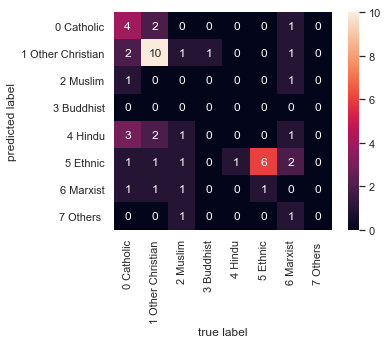

In [21]:

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, Y_predict)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [22]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
Y_predict=clf.predict(X_test)

In [23]:

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.4489795918367347

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       0.60      0.75      0.67        16
           2       0.50      0.60      0.55         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.25      0.43      0.32         7
           6       1.00      0.14      0.25         7

   micro avg       0.45      0.45      0.45        49
   macro avg       0.38      0.31      0.29        49
weighted avg       0.51      0.45      0.42        49



C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[ 3  5  1  0  0  3  0]
 [ 2 12  0  0  0  2  0]
 [ 0  1  3  0  0  1  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 2  1  1  0  0  3  0]
 [ 2  0  1  1  0  2  1]]


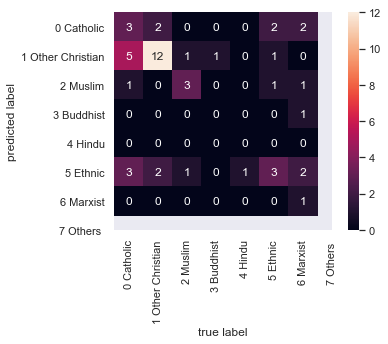

In [25]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, Y_predict)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
Y_predict=neigh.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.5102040816326531

[[ 9  2  0  0  0  1  0]
 [ 2 13  1  0  0  0  0]
 [ 1  3  1  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 2  2  1  0  0  2  0]
 [ 4  0  1  0  0  2  0]]


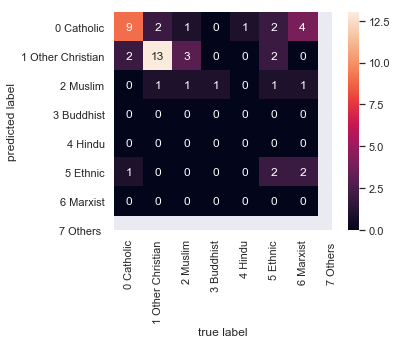

In [28]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, Y_predict)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
features3 = df.loc[:, df.columns.isin(['2','6','20','24','29','30'])]
target3 = df['7']
X_train3, X_test3,Y_train3, Y_test3 = train_test_split(
    features3, target3, test_size=0.25, random_state=5)

0.6326530612244898
[[10  1  0  0  0  1  0]
 [ 2 12  0  0  0  1  1]
 [ 0  0  1  3  0  1  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  7  0]
 [ 2  4  0  1  0  0  0]]


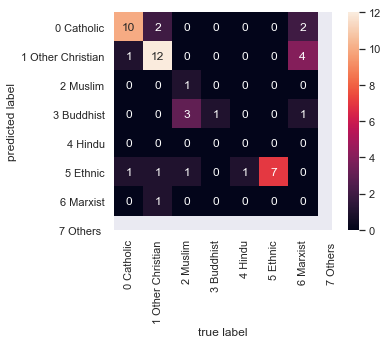

In [30]:
#切分特徵及答案2
features2 = df.loc[:, df.columns.isin(['2','6','24','29'])]
target2 = df['7']
X_train2, X_test2,Y_train2, Y_test2 = train_test_split(
    features2, target2, test_size=0.25, random_state=5)
#建立貝氏分類器
nbm2 = GaussianNB()
nbm2.fit(X_train2,Y_train2)
Y_predict2 = nbm2.predict(X_test2)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test2, Y_predict2))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test2, Y_predict2)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alant\Anaconda3\lib\sit

              precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       1.00      0.38      0.55        16
           2       0.50      0.20      0.29         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.54      1.00      0.70         7
           6       0.29      0.71      0.42         7
           7       0.00      0.00      0.00         0

   micro avg       0.45      0.45      0.45        49
   macro avg       0.33      0.32      0.28        49
weighted avg       0.58      0.45      0.44        49

0.4489795918367347
[[3 0 0 0 0 3 6 0]
 [5 6 0 0 0 1 4 0]
 [0 0 1 0 0 1 2 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 7 0 0]
 [1 0 1 0 0 0 5 0]
 [0 0 0 0 0 0 0 0]]


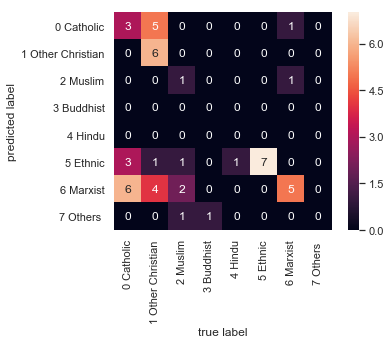

In [31]:

#建立貝氏分類器
nbm2 = GaussianNB()
nbm2.fit(X_train3,Y_train3)
Y_predict3 = nbm2.predict(X_test3)

from sklearn.metrics import classification_report
print(classification_report(Y_test3, Y_predict3))

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test3, Y_predict3))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test3, Y_predict3)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2, Y_predict2))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.71      0.75      0.73        16
           2       1.00      0.20      0.33         5
           3       0.20      1.00      0.33         1
           4       0.00      0.00      0.00         1
           5       0.64      1.00      0.78         7
           6       0.00      0.00      0.00         7

   micro avg       0.63      0.63      0.63        49
   macro avg       0.47      0.54      0.42        49
weighted avg       0.60      0.63      0.58        49



C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(nbm2, X_train2, Y_train2, cv=10, scoring='accuracy')
print(score)


[0.33333333 0.47058824 0.47058824 0.5625     0.28571429 0.57142857
 0.5        0.46153846 0.54545455 0.54545455]


C:\Users\alant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [34]:


print(""+str(score.mean()))

0.4746600213511979


In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(nbm2, X_train, Y_train, cv=10, scoring='accuracy')

print(score)

[0.44444444 0.47058824 0.35294118 0.5625     0.21428571 0.42857143
 0.5        0.38461538 0.36363636 0.45454545]


C:\Users\alant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [36]:

print(""+str(score.mean()))

0.4176128201863496


In [37]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train2, Y_train2)
Y_predict3 = clf.predict(X_test2)

C:\Users\alant\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [38]:
Y_predict3 = clf.predict(X_test2)

0.3469387755102041
[[4 2 1 0 0 0 5]
 [4 8 3 0 0 0 1]
 [0 0 3 0 0 0 2]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 7]
 [4 0 1 0 0 0 2]]


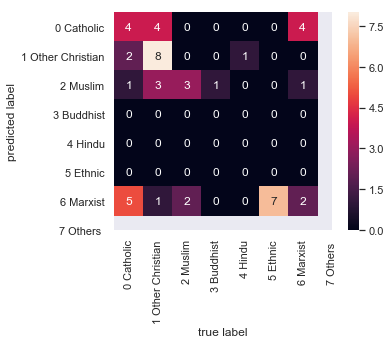

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test2, Y_predict3))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test2, Y_predict3)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train2,Y_train2)


In [41]:
Y_predict4 = clf.predict(X_test2)

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test2, Y_predict4))



0.6326530612244898


[[ 8  4  0  0  0  0  0  0]
 [ 1 13  1  0  0  1  0  0]
 [ 0  0  4  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  6  0  0]
 [ 4  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


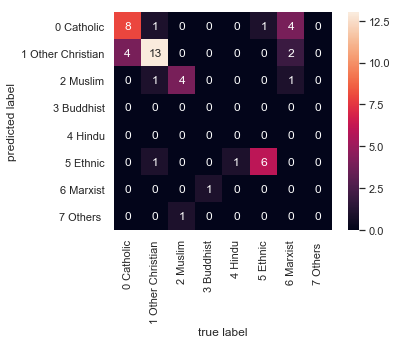

In [43]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test2, Y_predict4)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train2, Y_train2)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [45]:
Y_predict5 = neigh.predict(X_test2)

0.6122448979591837
[[ 8  4  0  0  0  0  0  0]
 [ 1 13  1  0  0  1  0  0]
 [ 0  0  4  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  6  0  0]
 [ 4  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


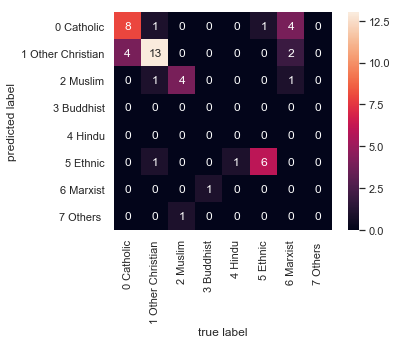

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test2, Y_predict5))
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test2, Y_predict4)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');


0.6122448979591837
[[ 9  1  1  0  0  1  0]
 [ 1 12  0  0  0  2  1]
 [ 0  0  4  0  0  1  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  5  0]
 [ 5  1  0  1  0  0  0]]


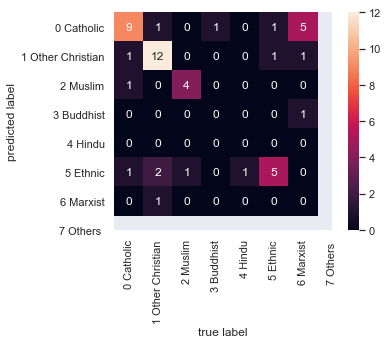

In [47]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train3, Y_train3)

Y_predict6 = neigh.predict(X_test3)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test3, Y_predict6))
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test3, Y_predict6)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [49]:
X,y =features, target
X2,y2 =features2, target2


In [50]:
#定義函式
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
ylim y 的限制

    """
    #畫圖
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\alant\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

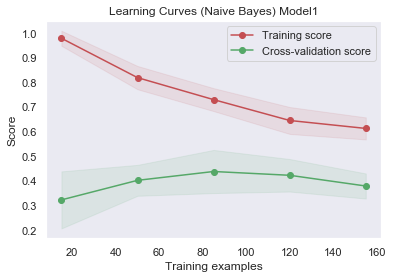

In [61]:
#學習曲線 Model1 GaussianNB
title = "Learning Curves (Naive Bayes) Model1"
# Cross validation with 100 iterations to get smoother mean test and train
#隨機抽樣切分0.2作為cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#建立估計模型
estimator = GaussianNB()
#畫圖
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\alant\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

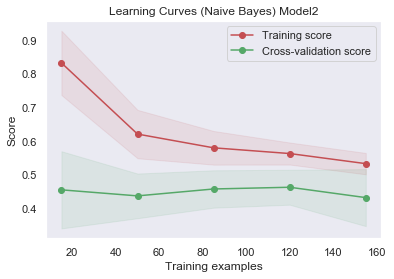

In [62]:
#學習曲線 Model2 GaussianNB
title = "Learning Curves (Naive Bayes) Model2"
# Cross validation with 100 iterations to get smoother mean test and train
#隨機抽樣切分0.2作為cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#建立估計模型
estimator = GaussianNB()
#畫圖
plot_learning_curve(estimator, title, X2, y2, cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\alant\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

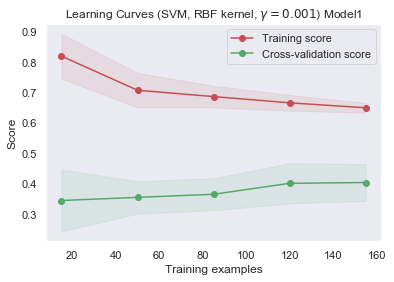

In [63]:
#SVM Model1 SVC
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$) Model1"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\alant\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

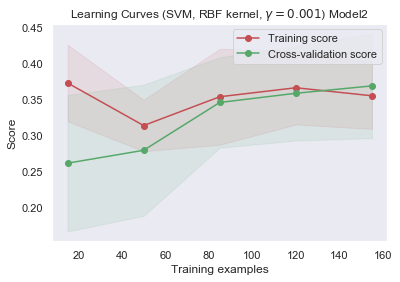

In [64]:
#SVM Model2 SVC
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$) Model2"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X2, y2, cv=cv, n_jobs=4)